# PANDAS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp


In [2]:
train = pd.read_csv(r'C:\Users\HP\Documents\New folder\data\train.csv',encoding='utf-8')
#print(train)    

In [3]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


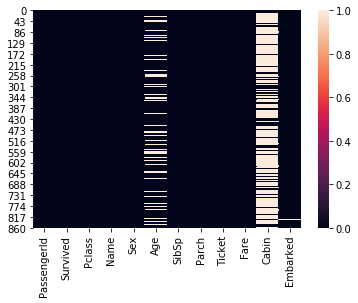

In [5]:
sns.heatmap(train.isnull())

we see we can use age but not cabin

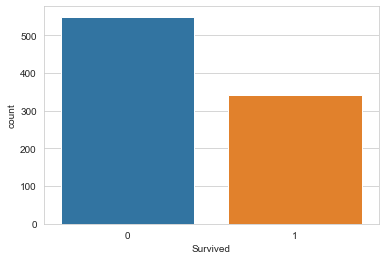

In [6]:
sns.set_style('whitegrid')
sns.countplot(data=train ,x='Survived')

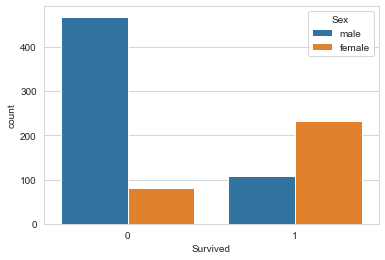

In [7]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',hue='Sex')

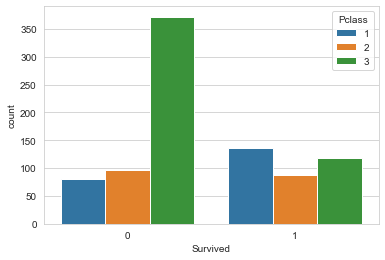

In [8]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',hue='Pclass')

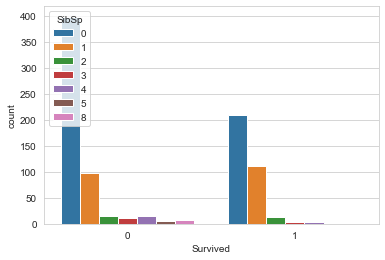

In [9]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',hue='SibSp')

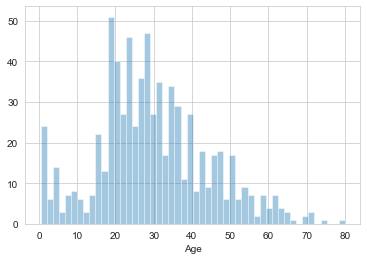

In [10]:
sns.distplot(train['Age'].dropna(),kde=False,hist=True,bins=50)

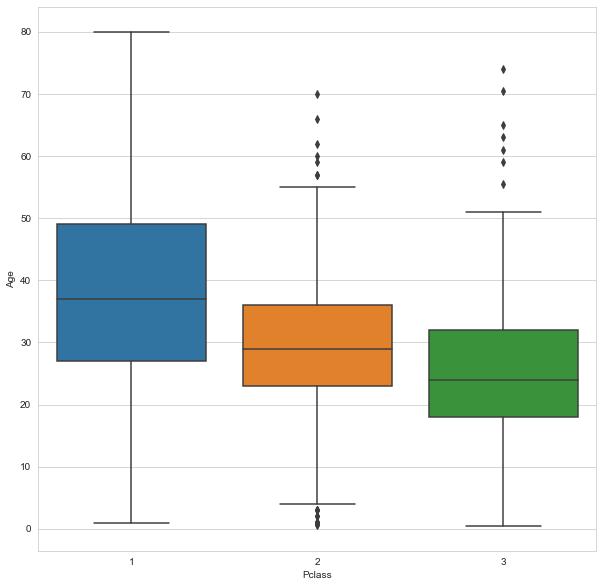

In [11]:
mp.figure(figsize=(10,10))
sns.boxplot(data=train,x='Pclass',y='Age')

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        elif Pclass==3:
            return 24
        else:
            return Age

In [21]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [23]:
#we use inplace to edit origional dataframe and make permanent changes . By default it is False 
train.drop('Cabin',axis=1,inplace=True)

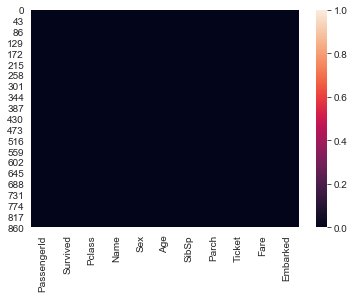

In [24]:
sns.heatmap(train.isnull())

# Handling categorical data

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


In [26]:
sex=pd.get_dummies(data=train['Sex'],drop_first='true')
print(sex)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]


In [27]:
embark = pd.get_dummies(data=train['Embarked'],drop_first='true')

In [28]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Embarked']


In [29]:
train.drop(['Embarked','Name','Sex','Ticket'],axis=1,inplace=True)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24,1,0,7.2500
1,2,1,1,37,1,0,71.2833
2,3,1,3,24,0,0,7.9250
3,4,1,1,37,1,0,53.1000
4,5,0,3,24,0,0,8.0500


In [31]:
train=pd.concat([train,sex],axis=1)

In [32]:
train=pd.concat([train,embark],axis=1)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(1), int64(6), uint8(3)
memory usage: 51.5 KB


# APPLYING LOGITIC REGRESSION FIRST `

### SPLITTING

In [34]:
#as survived is the dependat value we drop it
#training 
train.drop(['Survived'],axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,24,1,0,7.2500,1,0,1
1,2,1,37,1,0,71.2833,0,0,0
2,3,3,24,0,0,7.9250,0,0,1
3,4,1,37,1,0,53.1000,0,0,1
4,5,3,24,0,0,8.0500,1,0,1


In [35]:
#testing
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
 X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1),train['Survived'] , test_size=0.33, random_state=42)

# prediction 

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()

In [47]:
lr.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
pred = lr.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [59]:
acc = confusion_matrix(y_test,pred) 

In [60]:
acc

array([[143,  32],
       [ 32,  88]], dtype=int64)

In [61]:
percent = accuracy_score(y_test,pred)

In [1]:
percent

NameError: name 'percent' is not defined

# DECISION TREES 